### Importing all required libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Reading and understanding data

In [9]:
df = pd.read_csv(r'C:\Users\Rahul_PC_2022\Data Science\Lead Scoring Assignment\Leads.csv')

In [10]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
df.shape

(9240, 37)

### Check data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [14]:
df['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [15]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [16]:
#Get the list of columns with null values
columns_with_null = df.columns[df.isnull().any()].tolist()

# Print the result
print("Columns with null values:", columns_with_null)

Columns with null values: ['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [17]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Check duplicate values

In [18]:
df.duplicated().sum()

0

### Working on treating missing values

In [19]:
# Dropping columns with more than 3k missing values
columns_to_drop = ['Lead Quality','Tags','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

df.drop(columns=columns_to_drop, inplace=True)

In [20]:
# Dropping categorical columns with same values across

df.drop(columns=['What matters most to you in choosing a course'], inplace=True)

# Dropping Prospect id and Lead Numbercolumn as it is not useful for model
df.drop(columns=['Prospect ID','Lead Number'], inplace=True)


In [21]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

### Treating the missing value

In [22]:
# filling missing value in categorical variable with new category
df['Lead Source'].fillna('Others', inplace=True)
df['Last Activity'].fillna('Others', inplace=True)
df['Country'].fillna('Others', inplace=True)
df['Specialization'].fillna('Others', inplace=True)
df['Specialization'].replace('Select', 'Others', inplace=True)
df['How did you hear about X Education'].fillna('Others', inplace=True)
df['How did you hear about X Education'].replace('Select', 'Others', inplace=True)
df['What is your current occupation'].fillna('Others', inplace=True)
df['City'].fillna('Other Cities', inplace=True)
df['City'].replace('Select', 'Other Cities', inplace=True)
df['Lead Profile'].fillna('Other Leads', inplace=True)
df['Lead Profile'].replace('Select', 'Others', inplace=True)

In [23]:
# Dropping rows where missing value less then 2%
column_to_check = ['Page Views Per Visit','TotalVisits']
df.dropna(subset=column_to_check,inplace=True)

In [24]:
df.shape

(9103, 28)

In [25]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

We have 24 categorical features : ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [26]:
#Custom function for univariate analysis of numerical features
def eda_univariate_analysis_numerical(df, numeric_features):
    no_of_num_features = len(numeric_features)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(no_of_num_features / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    
    for i, (col, ax) in enumerate(zip(numeric_features, axes.flat)):
        sns.histplot(data=df, x=col, kde=True, color='green', ax=ax)
        ax.set_title(f'{col} Distribution')
    
    # Remove any empty subplots
    for i in range(no_of_num_features, num_rows * num_cols):
        fig.delaxes(axes.flat[i])
    
    plt.tight_layout()
    
    # Add a line of text
    plt.text(0.5, 0.5, "Boxplots to identify outliers", fontsize=14, ha='center')
    
    
    # Create box plot to identify outliers
    
    for col in numeric_features:
        plt.figure(figsize=(8, 2)) 
        sns.boxplot(data=df, x=col, color='skyblue')
        plt.title(f'{col} Box Plot')
    
    plt.show()

<a id="3.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Univariate Analysis Numerical Features</h3>

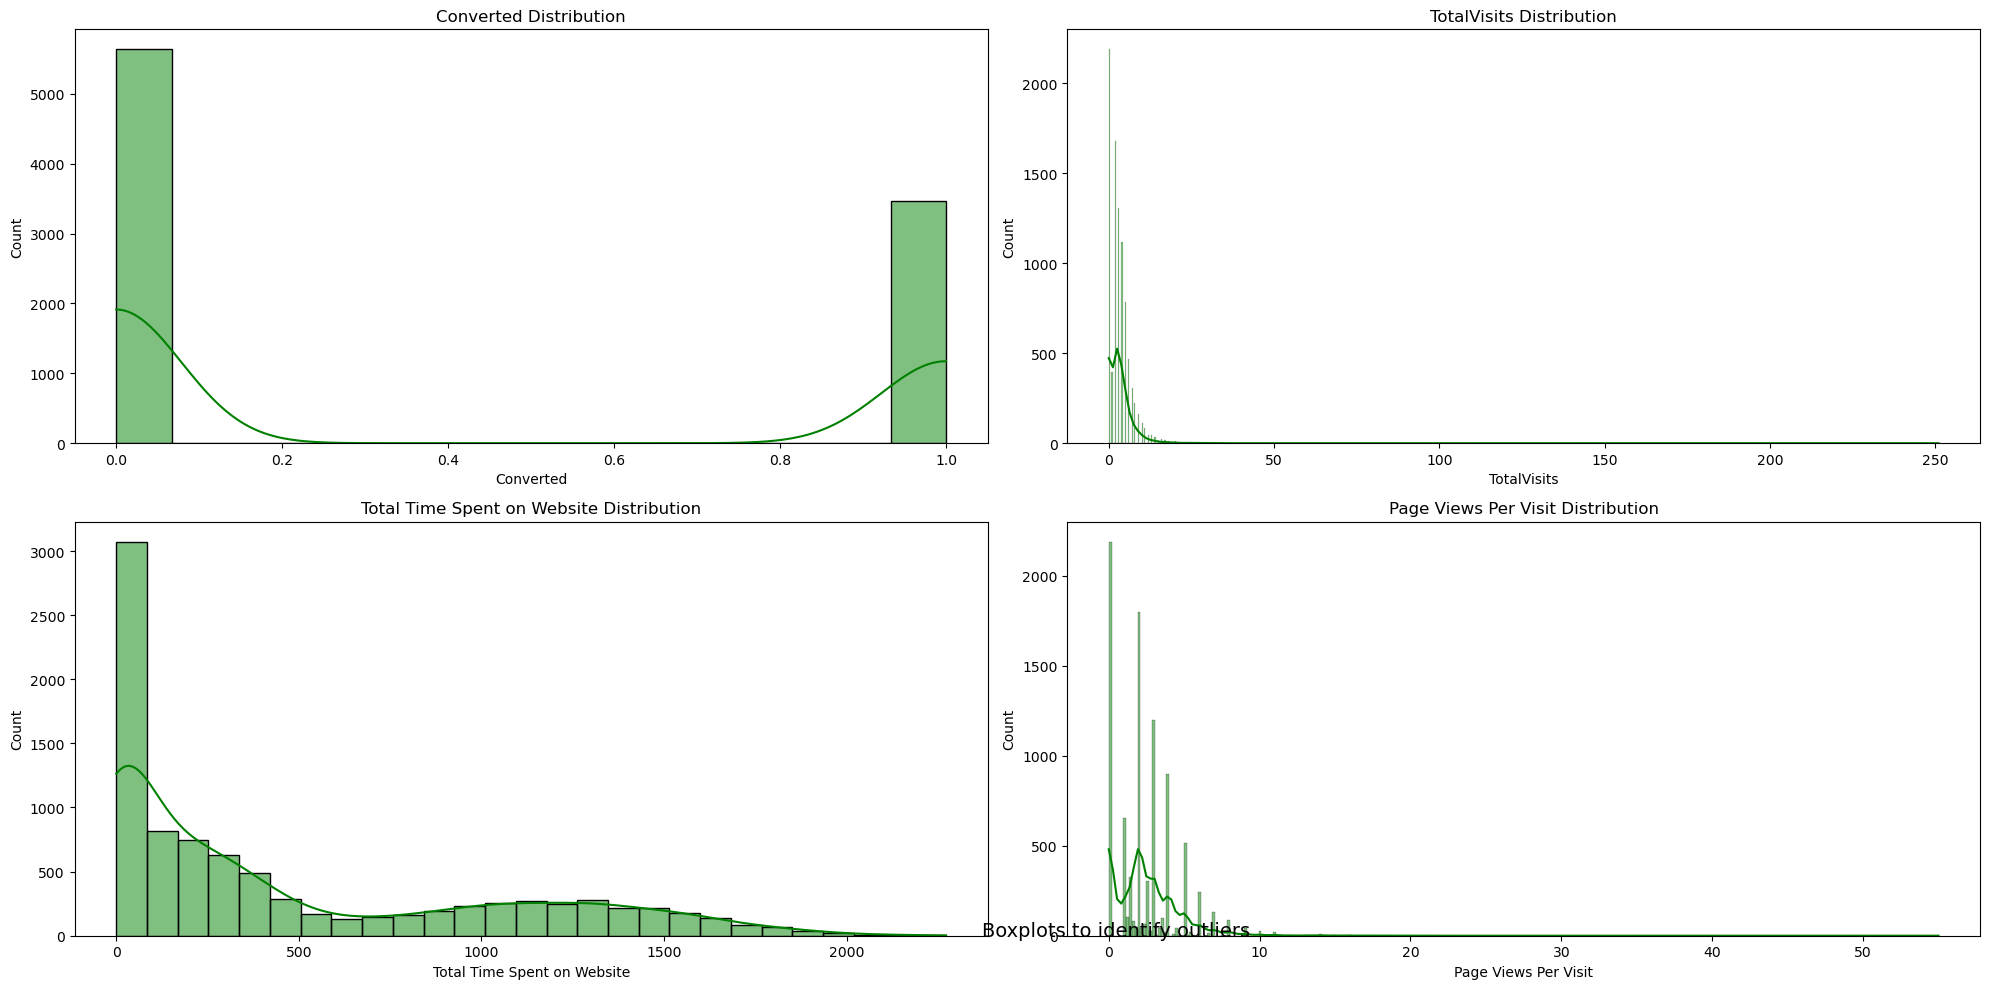

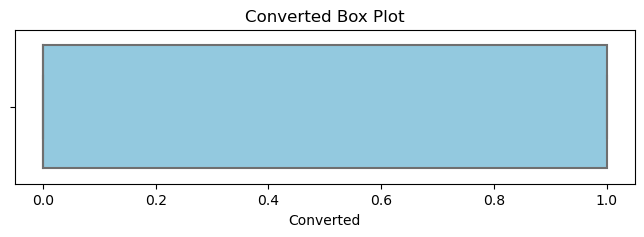

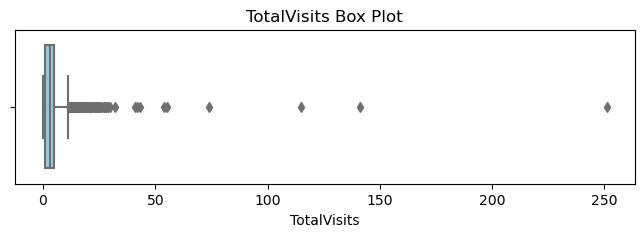

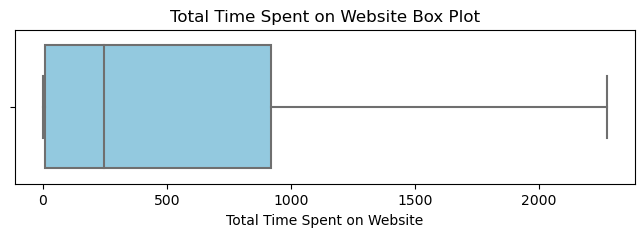

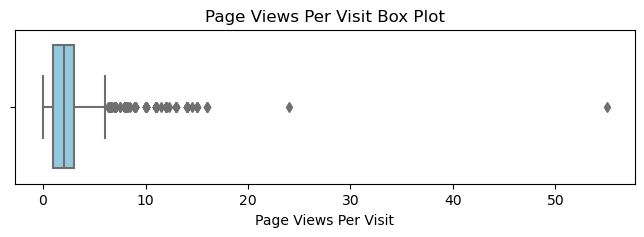

In [27]:
eda_univariate_analysis_numerical(df, numeric_features)

In [28]:
#Custom function for univariate analysis of categorical features
def eda_univariate_analysis_categorical(df, categorical_features):

    no_of_cat_features = len(categorical_features)
    num_cols = 2  # Number of columns in the subplot grid (two charts in one row)
    num_rows = math.ceil(no_of_cat_features / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(categorical_features):
        row_index = i // num_cols  # Calculate the row index
        col_index = i % num_cols   # Calculate the column index

        sns.countplot(data=df, x=col, ax=axes[row_index, col_index], color='green')
        axes[row_index, col_index].set_title(f'{col} Distribution')
    
    # Remove any empty subplots
    for i in range(no_of_cat_features, num_rows * num_cols):
        fig.delaxes(axes.flat[i])
    
    plt.tight_layout()
    plt.show()

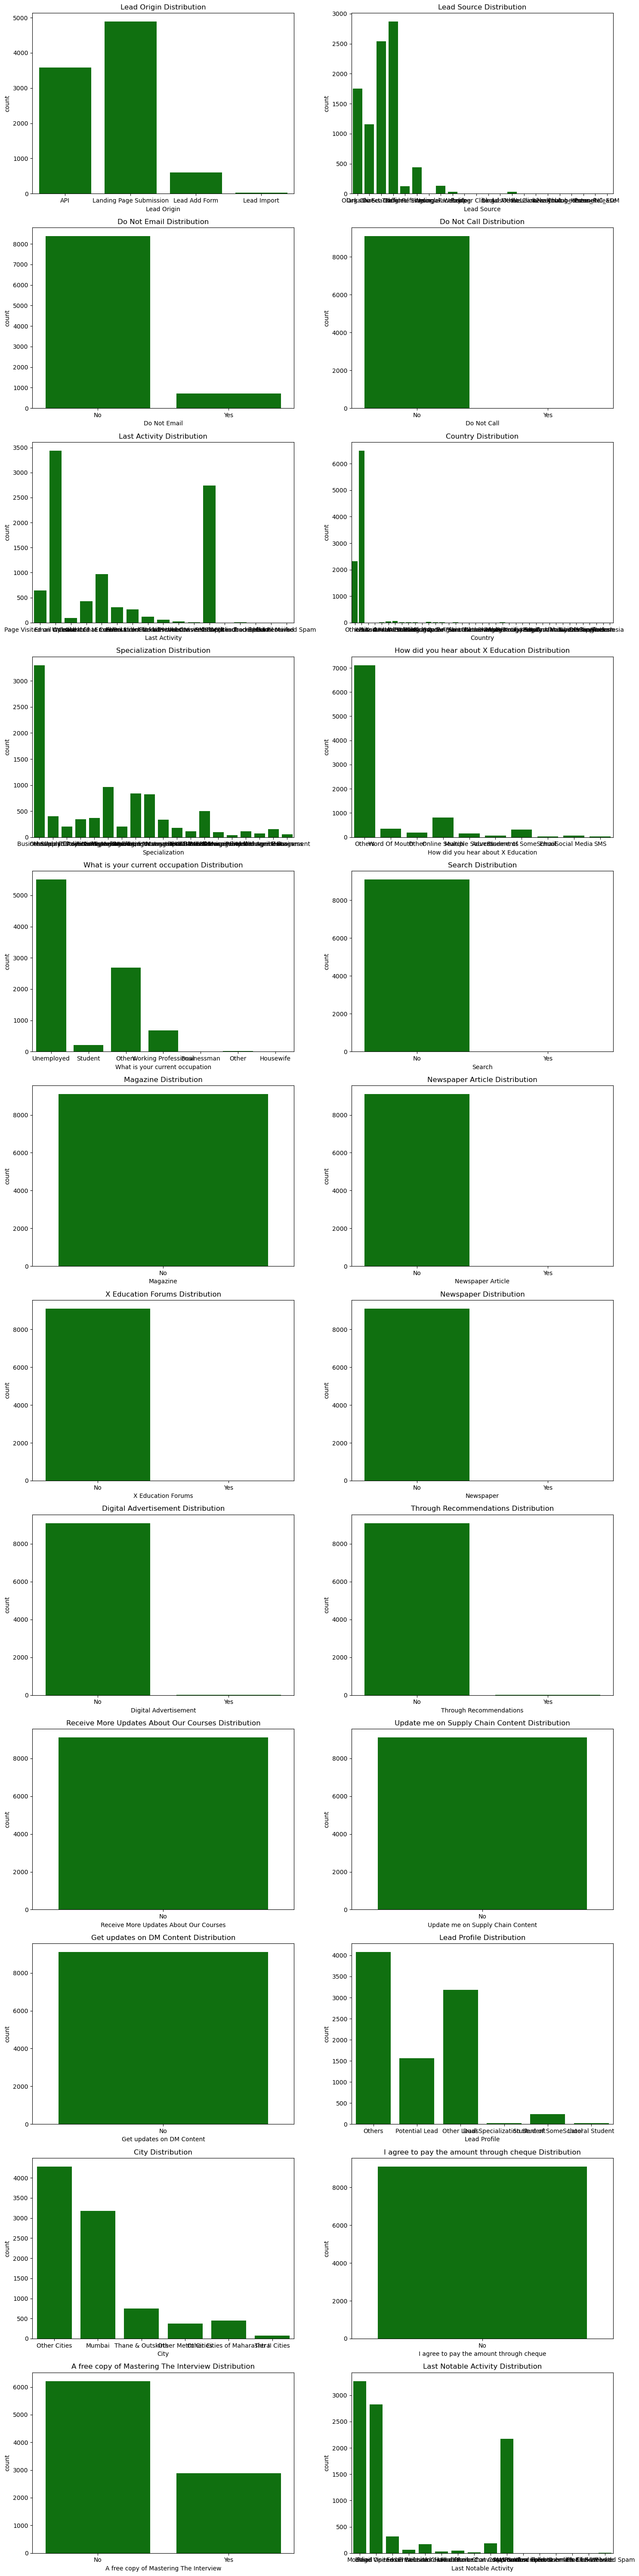

In [29]:
eda_univariate_analysis_categorical(df, categorical_features)

In [30]:
#Custom function for Bivariate analysis of categorical & Numerical features with target variable

def eda_bivariate_analysis(df,categorical_features,numeric_features,target_variable):

    # Exclude the target variable from the numeric features
    if target_variable in numeric_features:
        numeric_features.remove(target_variable)
        
    for feature in numeric_features:
        # Calculate the means for each category of the dependent variable
        means = df.groupby(target_variable)[feature].mean().reset_index()

        # Create a bar plot to visualize the means of the numerical feature by the categorical dependent variable
        plt.figure(figsize=(8, 6))
        sns.barplot(x=target_variable, y=feature, data=means)
        plt.title(f'Means of {feature} by {target_variable}')
        plt.show()
        print(f'Means of {feature} by {target_variable}:\n{means}\n')
    
    
    #To figure out average churn rate for all categorical variables
    df[target_variable].value_counts(normalize = True) 
    
    df_v1 = df
    
    if target_variable in categorical_features:
        categorical_features.remove(target_variable)
    
    #To figure out using bivariate analysis some insights on churn 
    for i in categorical_features:
        bivariate_data = df_v1.groupby(i)[target_variable].mean().reset_index()
        print(bivariate_data)
        plt.figure(figsize=(12, 8))
        sns.barplot(x=i, y=target_variable, data=bivariate_data)
        plt.title(i+' vs. Target Variable')
        plt.xticks(rotation=45, ha='right')
        plt.show()    

<a id="3.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Bivariate analysis with Target Variable</h3>

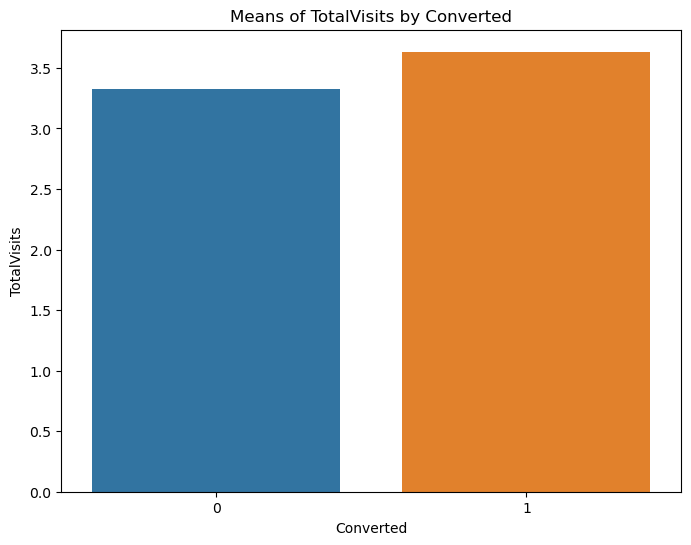

Means of TotalVisits by Converted:
   Converted  TotalVisits
0          0     3.329670
1          1     3.633632



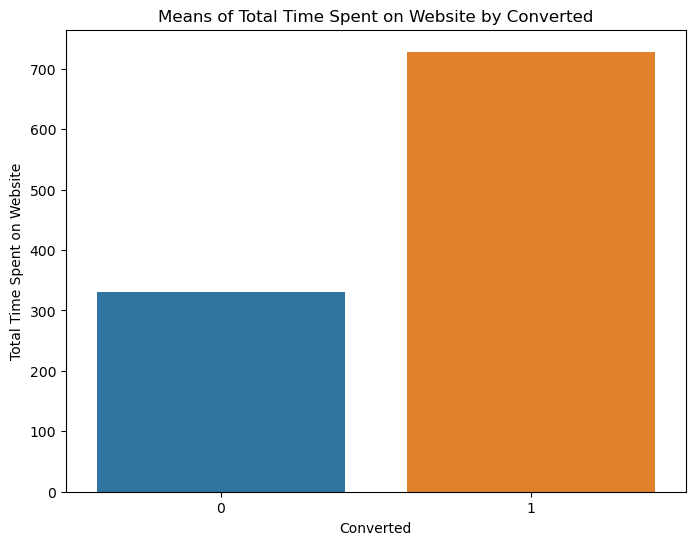

Means of Total Time Spent on Website by Converted:
   Converted  Total Time Spent on Website
0          0                   329.832329
1          1                   728.349032



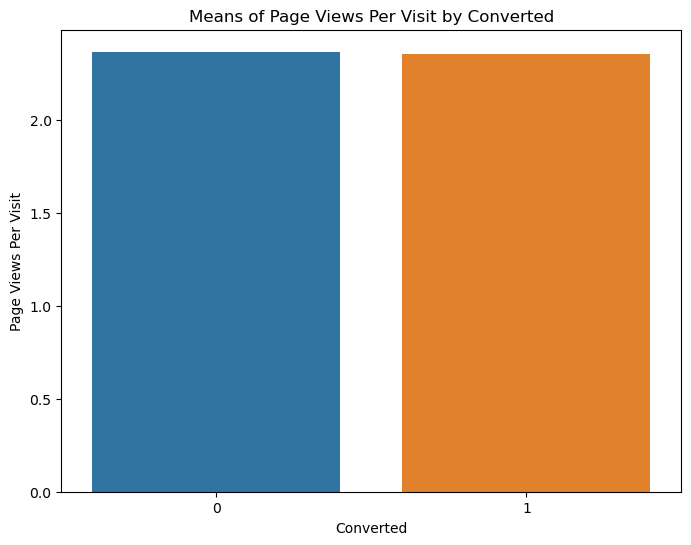

Means of Page Views Per Visit by Converted:
   Converted  Page Views Per Visit
0          0              2.368453
1          1              2.353638

               Lead Origin  Converted
0                      API   0.311627
1  Landing Page Submission   0.361850
2            Lead Add Form   0.935855
3              Lead Import   0.290323


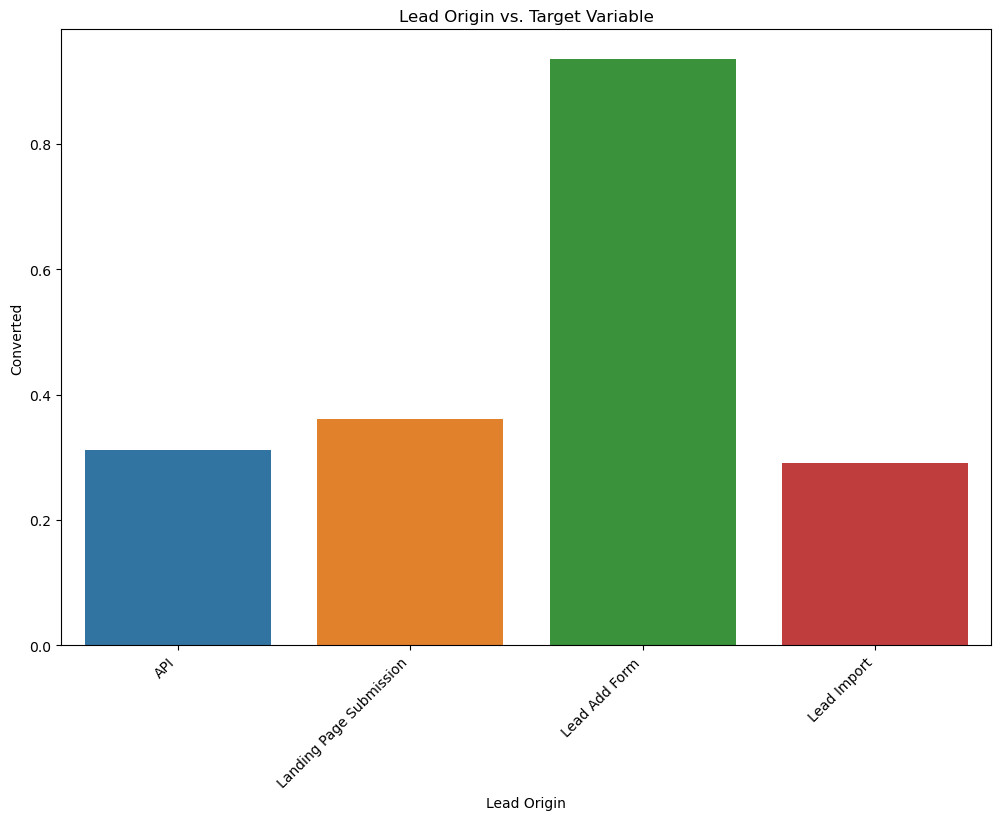

          Lead Source  Converted
0          Click2call   0.750000
1      Direct Traffic   0.321667
2            Facebook   0.290323
3              Google   0.399930
4           Live Chat   1.000000
5              NC_EDM   1.000000
6          Olark Chat   0.255562
7      Organic Search   0.377816
8              Others   0.896552
9   Pay per Click Ads   0.000000
10      Press_Release   0.000000
11          Reference   0.925508
12     Referral Sites   0.248000
13       Social Media   0.500000
14            WeLearn   1.000000
15   Welingak Website   0.984496
16               bing   0.166667
17               blog   0.000000
18             google   0.000000
19            testone   0.000000
20   welearnblog_Home   0.000000
21     youtubechannel   0.000000


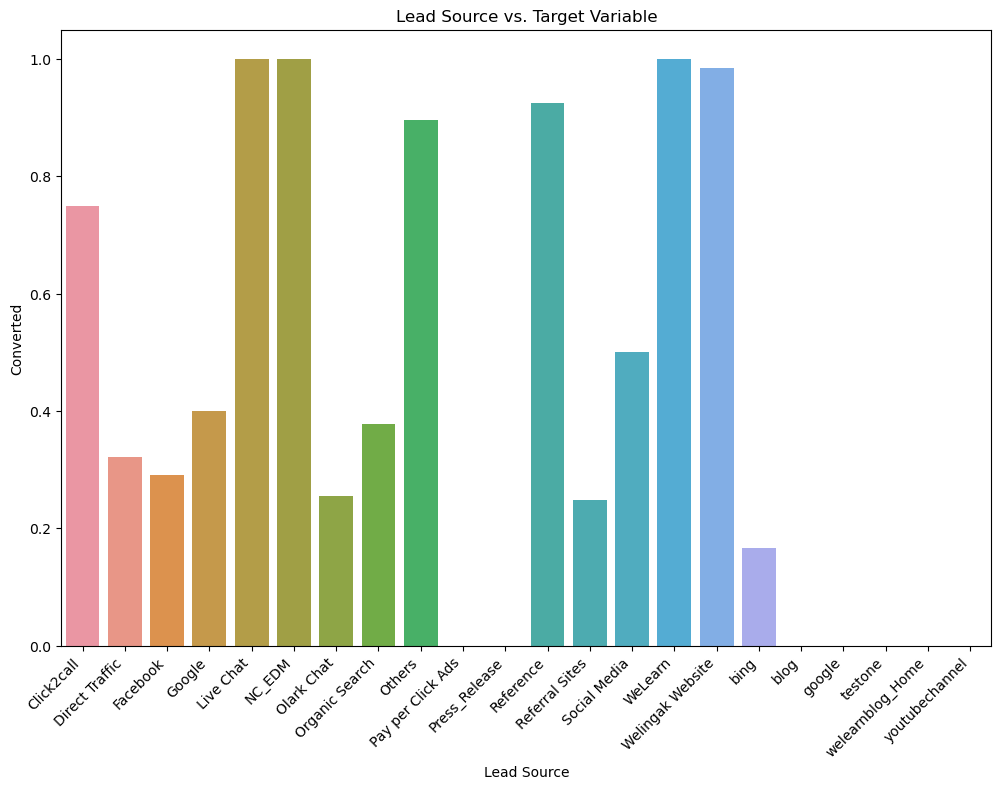

  Do Not Email  Converted
0           No   0.399690
1          Yes   0.154696


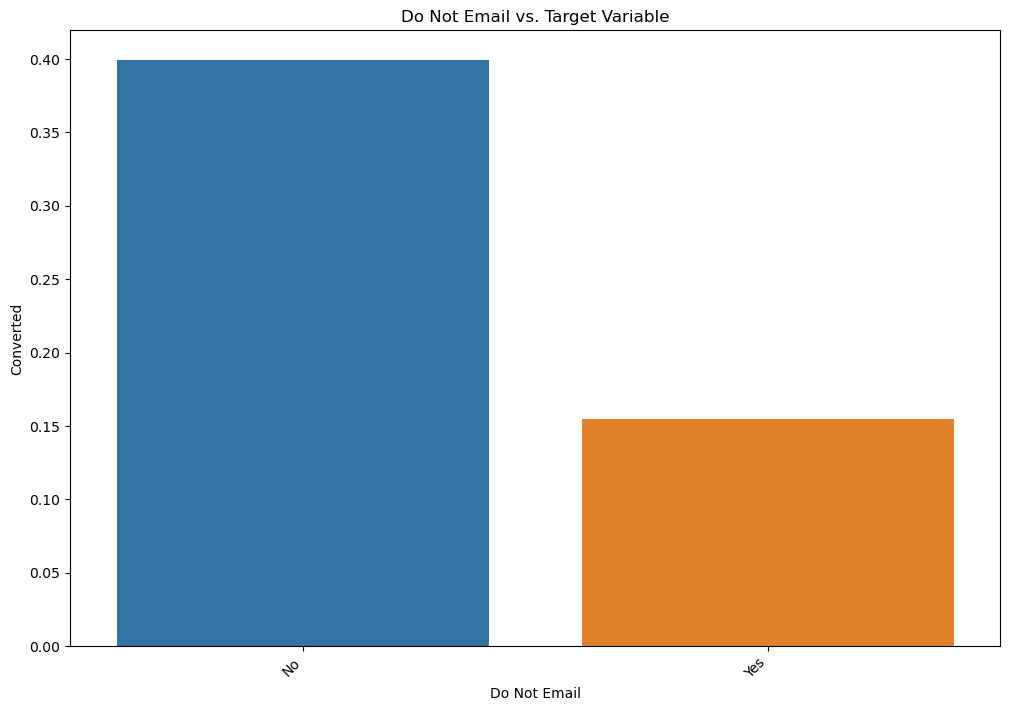

  Do Not Call  Converted
0          No   0.380068
1         Yes   1.000000


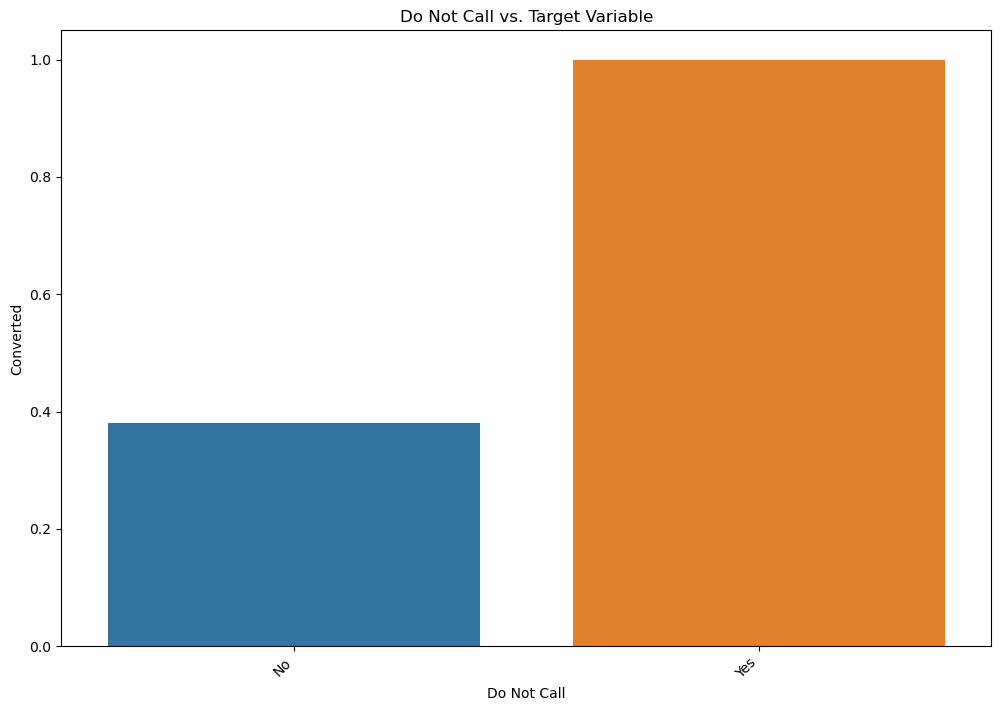

                   Last Activity  Converted
0             Approached upfront   1.000000
1              Converted to Lead   0.126168
2                  Email Bounced   0.051282
3             Email Link Clicked   0.273408
4              Email Marked Spam   1.000000
5                   Email Opened   0.364562
6                 Email Received   1.000000
7      Form Submitted on Website   0.241379
8       Had a Phone Conversation   0.800000
9        Olark Chat Conversation   0.086420
10       Page Visited on Website   0.235937
11        Resubscribed to emails   1.000000
12                      SMS Sent   0.630387
13                   Unreachable   0.322222
14                  Unsubscribed   0.262295
15  View in browser link Clicked   0.166667
16    Visited Booth in Tradeshow   0.000000


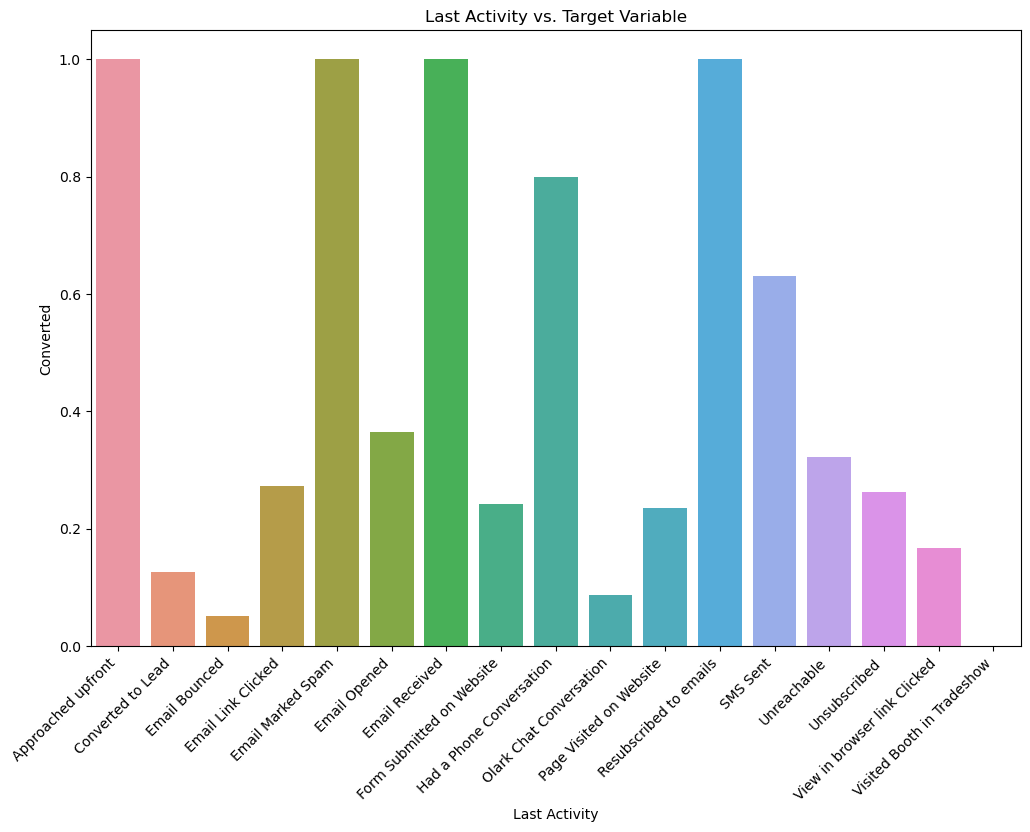

                 Country  Converted
0    Asia/Pacific Region   0.500000
1              Australia   0.230769
2                Bahrain   0.571429
3             Bangladesh   0.500000
4                Belgium   0.000000
5                 Canada   0.000000
6                  China   0.000000
7                Denmark   1.000000
8                 France   0.500000
9                Germany   0.250000
10                 Ghana   0.000000
11             Hong Kong   0.571429
12                 India   0.369840
13             Indonesia   0.000000
14                 Italy   0.000000
15                 Kenya   0.000000
16                Kuwait   0.000000
17               Liberia   0.000000
18              Malaysia   0.000000
19           Netherlands   0.500000
20               Nigeria   0.000000
21                  Oman   0.500000
22                Others   0.419966
23           Philippines   0.000000
24                 Qatar   0.100000
25                Russia   0.000000
26          Saudi Arabia   0

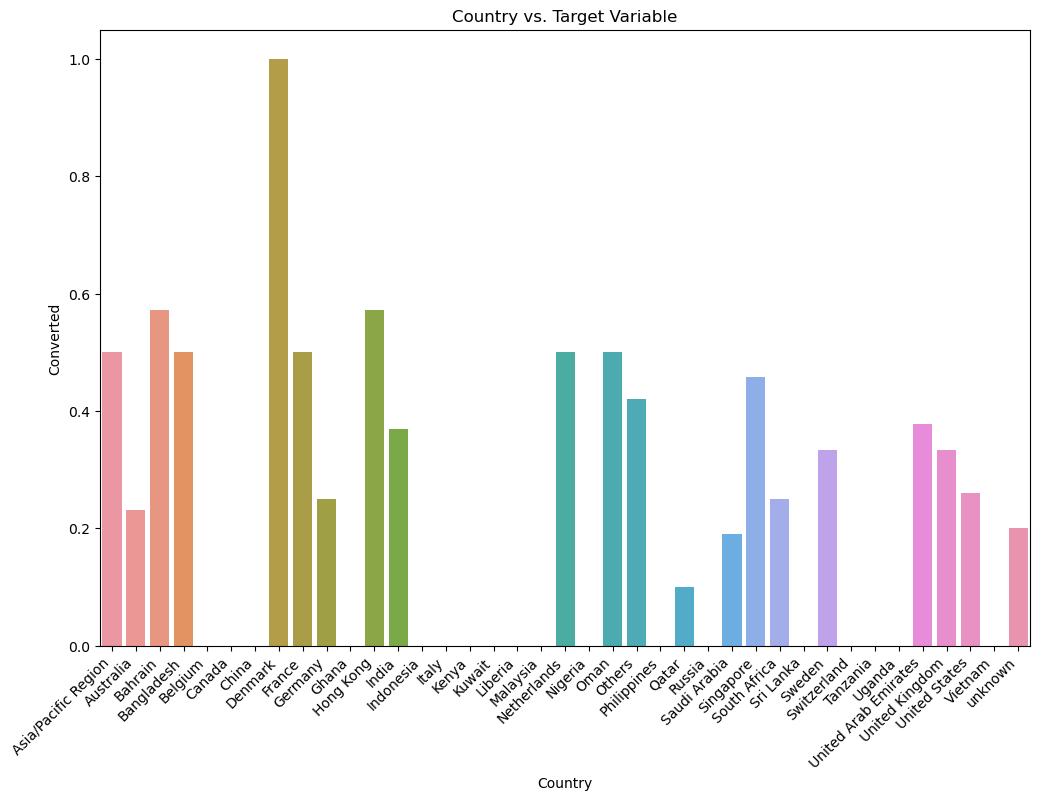

                       Specialization  Converted
0   Banking, Investment And Insurance   0.489552
1             Business Administration   0.438596
2                          E-Business   0.368421
3                          E-COMMERCE   0.351351
4                  Finance Management   0.441788
5               Healthcare Management   0.490446
6              Hospitality Management   0.405405
7           Human Resource Management   0.454654
8              IT Projects Management   0.382514
9              International Business   0.352273
10               Marketing Management   0.483010
11              Media and Advertising   0.415842
12              Operations Management   0.470000
13                             Others   0.278450
14                  Retail Management   0.340000
15             Rural and Agribusiness   0.424658
16                Services Excellence   0.275000
17            Supply Chain Management   0.427746
18                 Travel and Tourism   0.351485


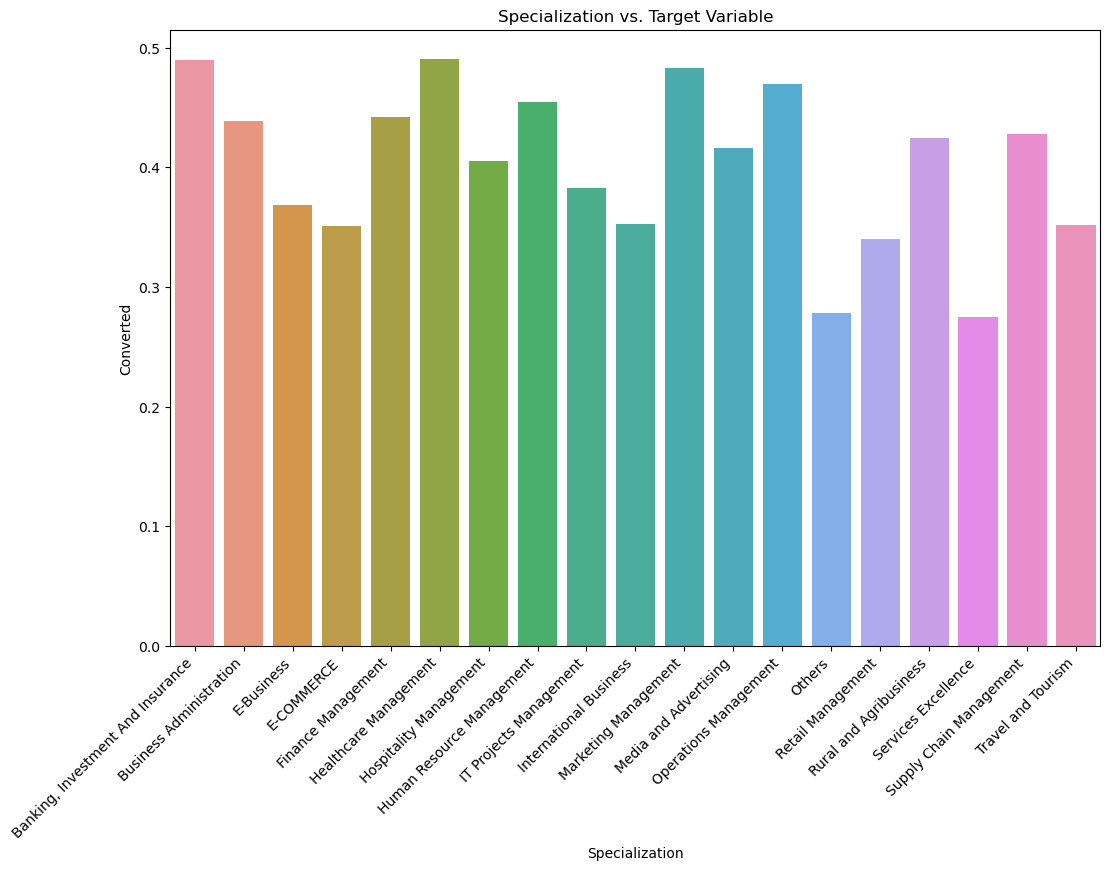

  How did you hear about X Education  Converted
0                     Advertisements   0.457143
1                              Email   0.500000
2                   Multiple Sources   0.368421
3                      Online Search   0.424505
4                              Other   0.403226
5                             Others   0.367585
6                                SMS   0.217391
7                       Social Media   0.409091
8              Student of SomeSchool   0.461290
9                      Word Of Mouth   0.436782


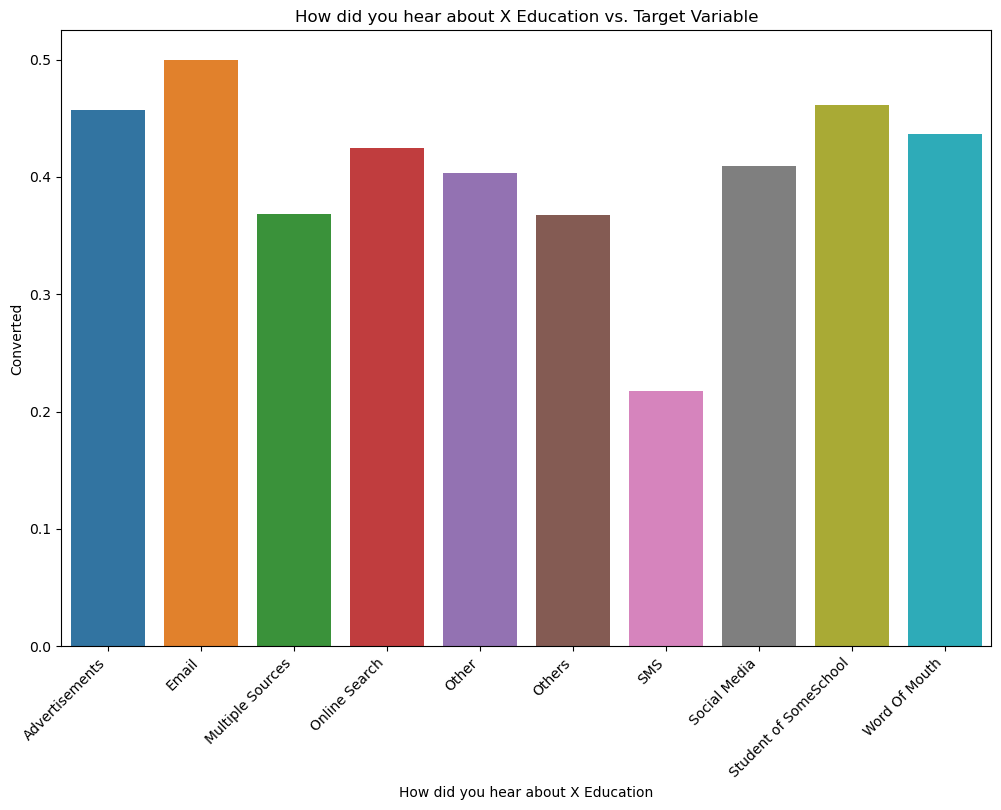

  What is your current occupation  Converted
0                     Businessman   0.625000
1                       Housewife   1.000000
2                           Other   0.600000
3                          Others   0.137905
4                         Student   0.362319
5                      Unemployed   0.430571
6            Working Professional   0.918999


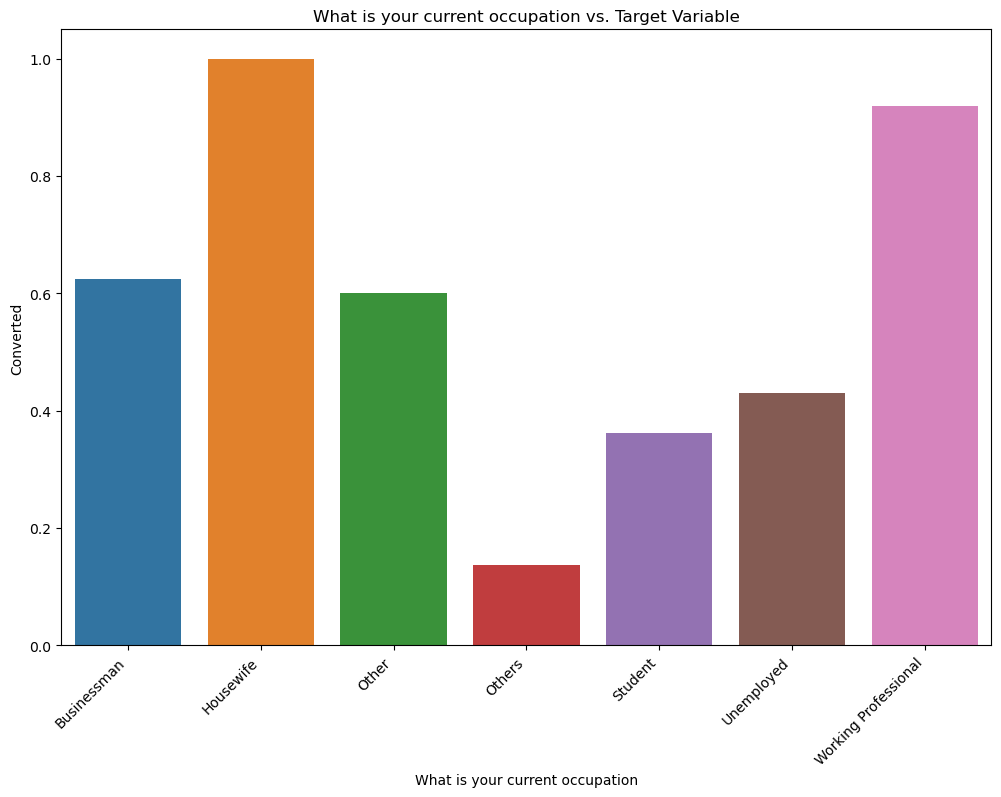

  Search  Converted
0     No   0.380240
1    Yes   0.357143


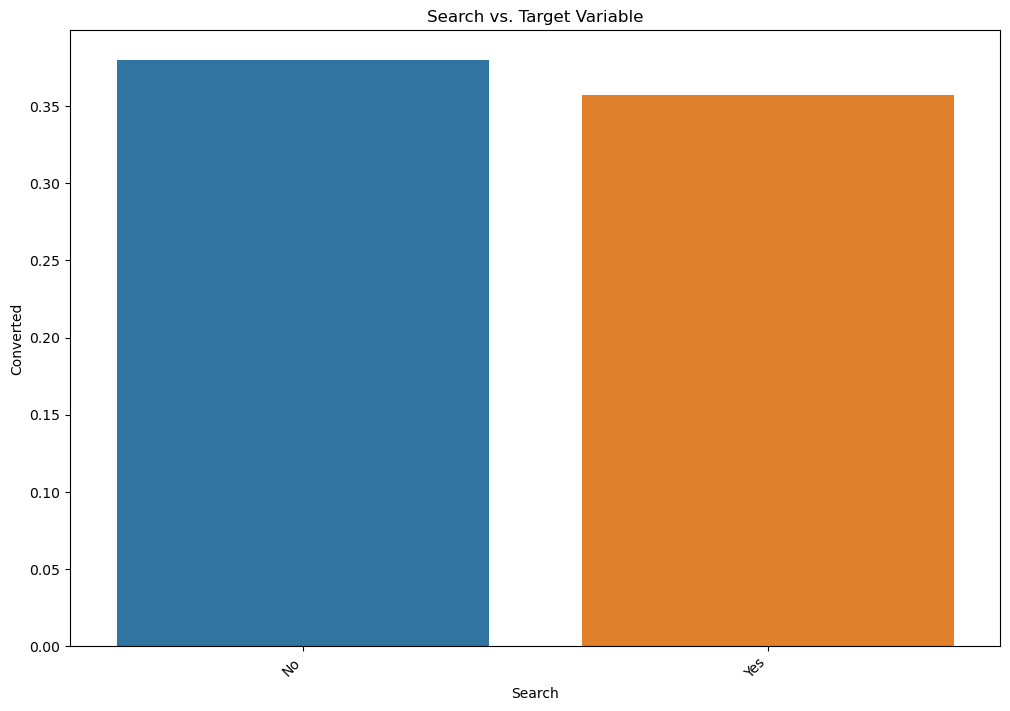

  Magazine  Converted
0       No   0.380204


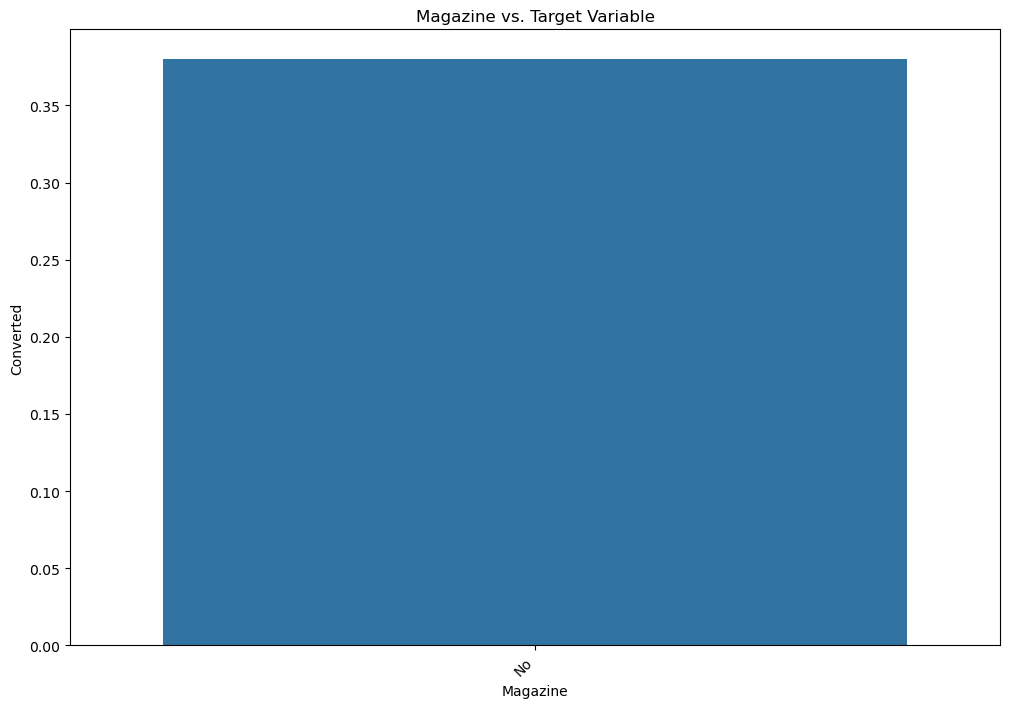

  Newspaper Article  Converted
0                No   0.380178
1               Yes   0.500000


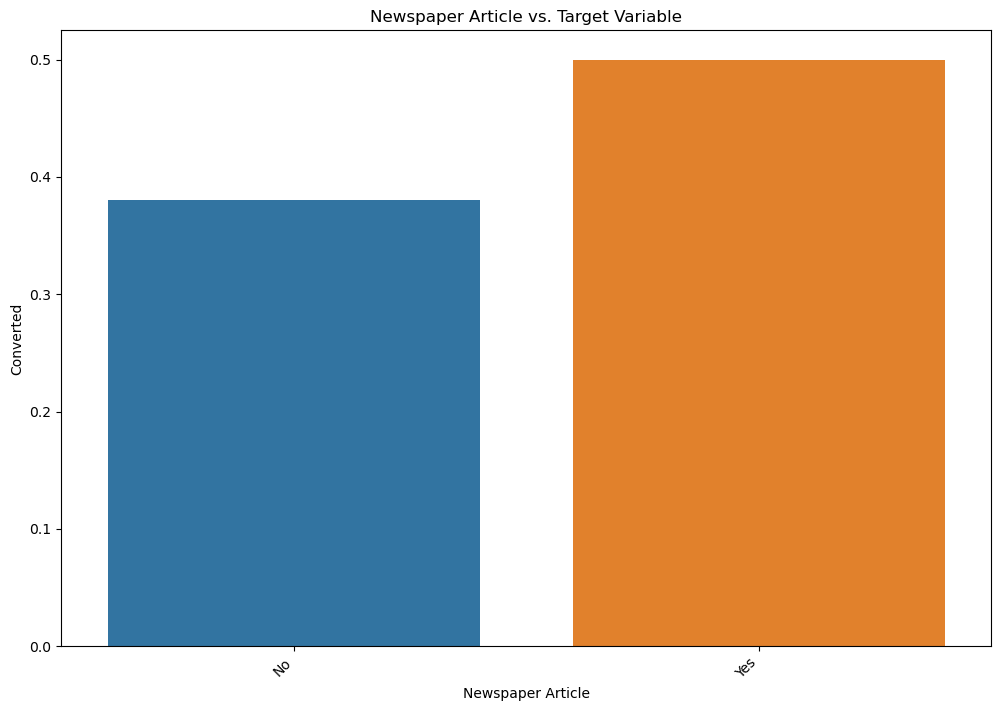

  X Education Forums  Converted
0                 No   0.380246
1                Yes   0.000000


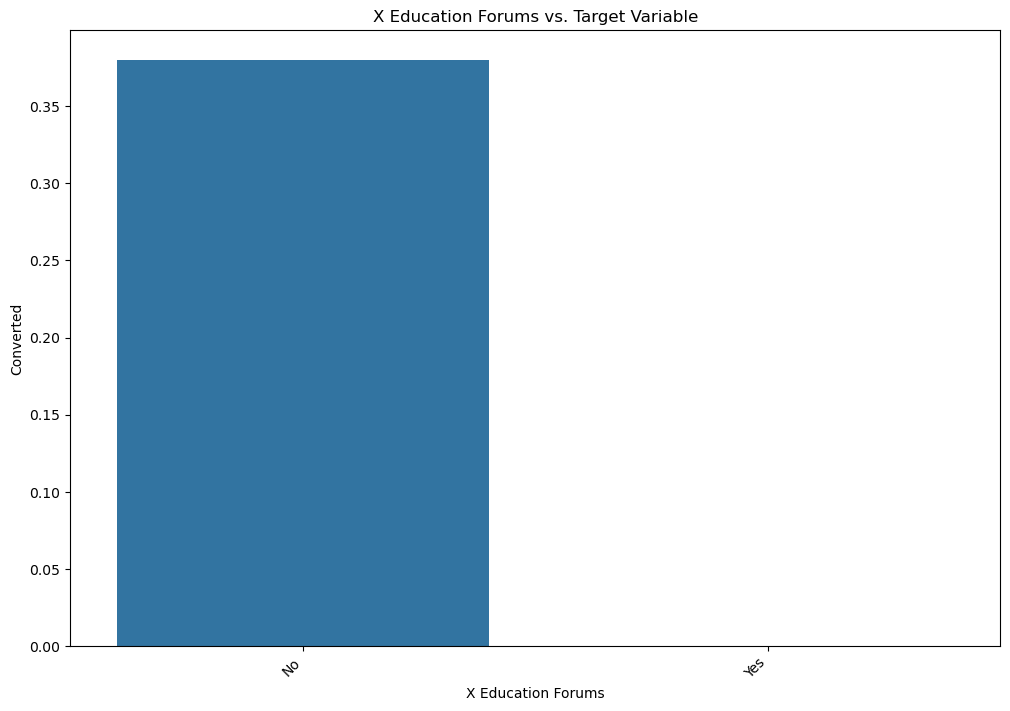

  Newspaper  Converted
0        No   0.380246
1       Yes   0.000000


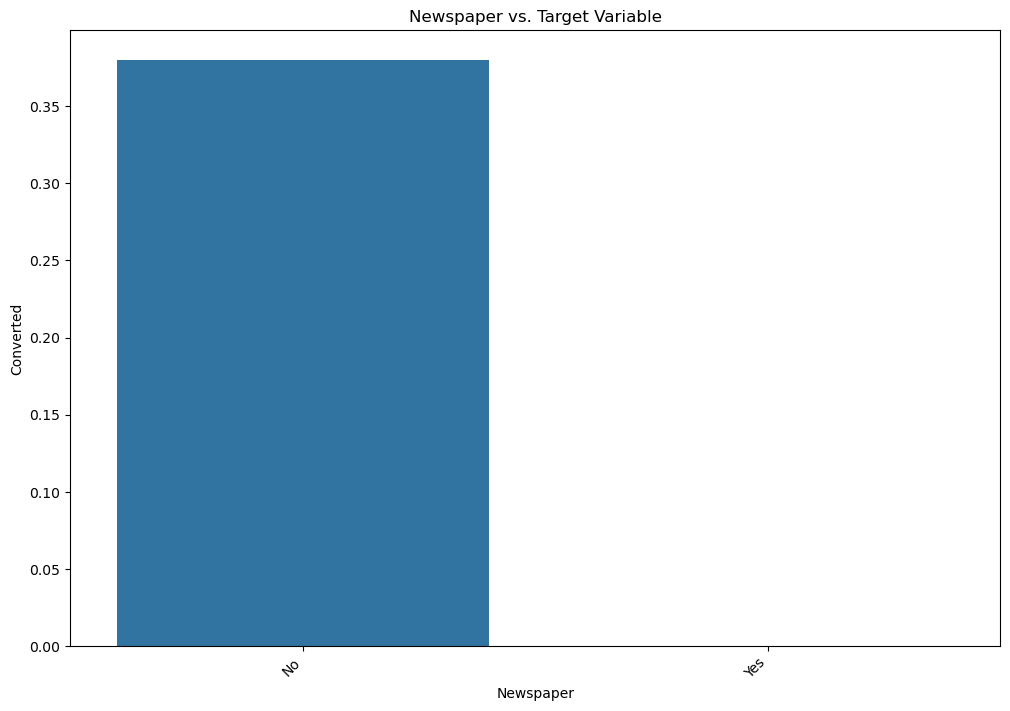

  Digital Advertisement  Converted
0                    No   0.380262
1                   Yes   0.250000


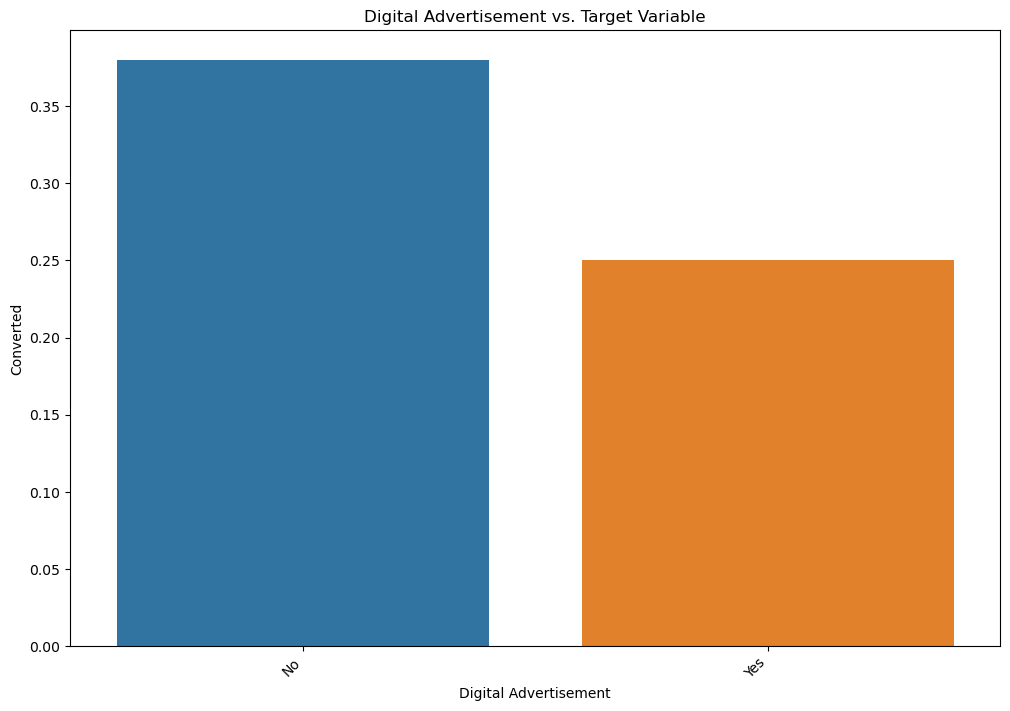

  Through Recommendations  Converted
0                      No   0.379947
1                     Yes   0.714286


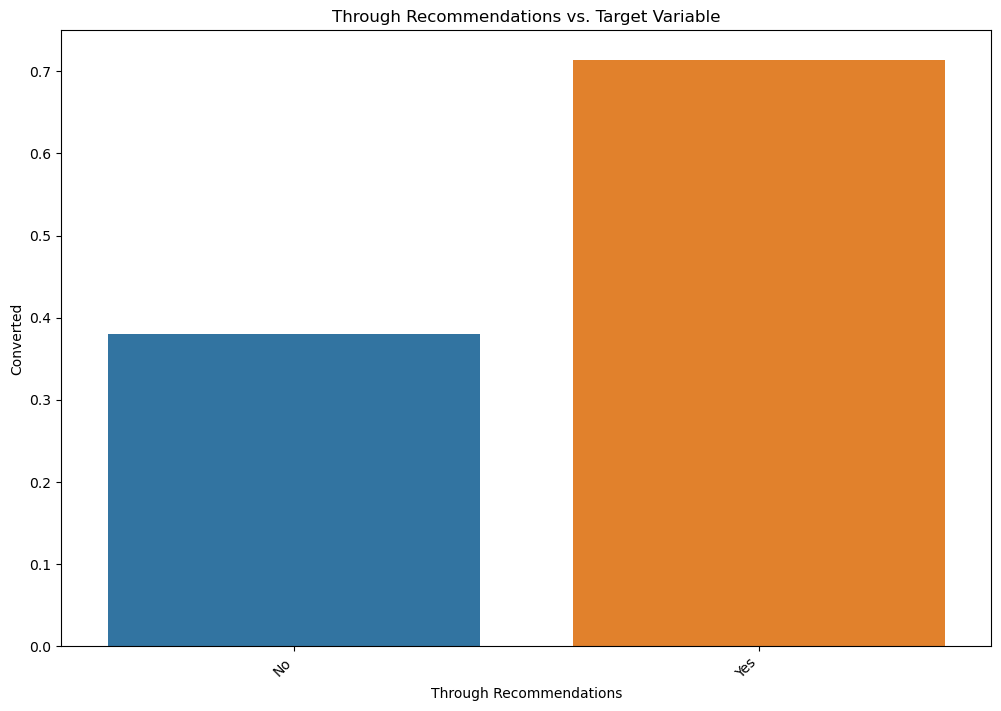

  Receive More Updates About Our Courses  Converted
0                                     No   0.380204


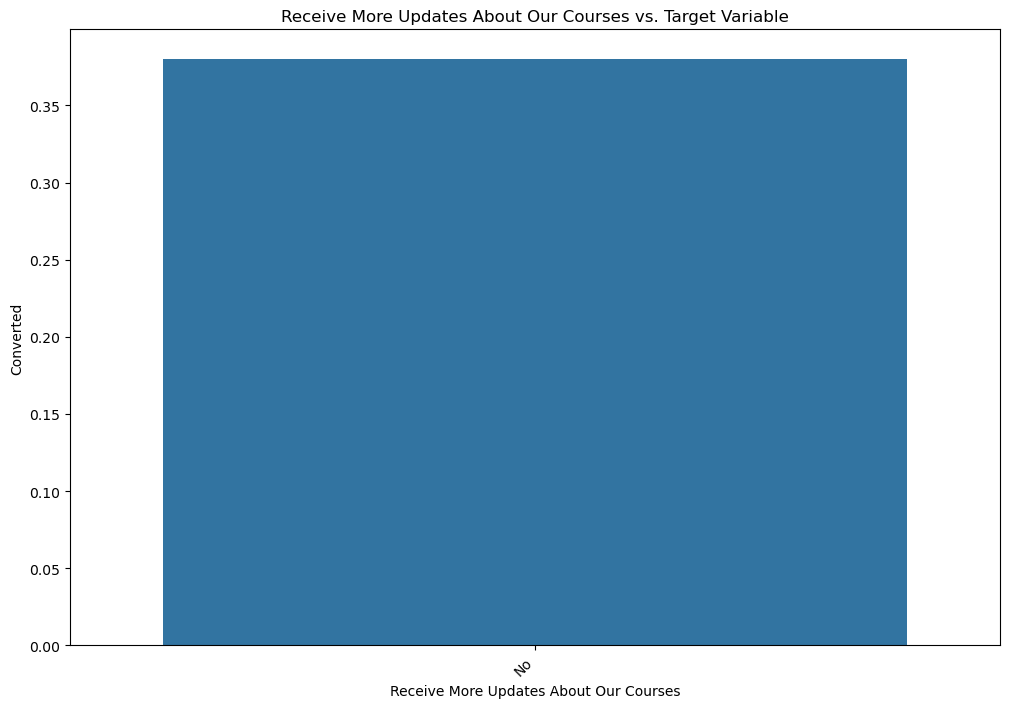

  Update me on Supply Chain Content  Converted
0                                No   0.380204


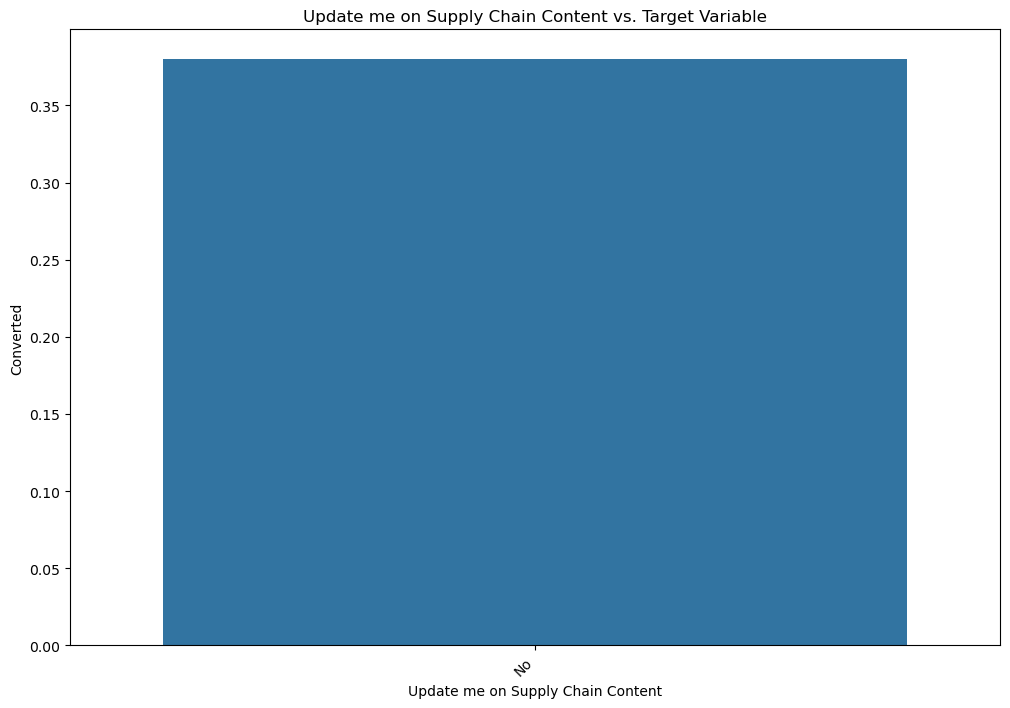

  Get updates on DM Content  Converted
0                        No   0.380204


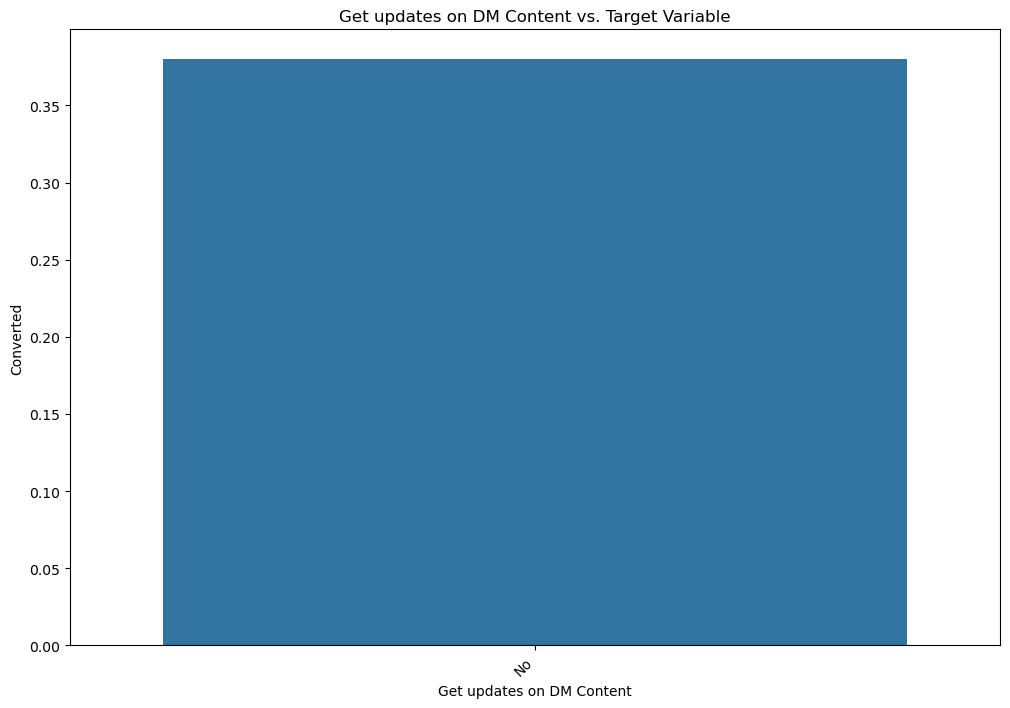

                  Lead Profile  Converted
0  Dual Specialization Student   1.000000
1              Lateral Student   1.000000
2                  Other Leads   0.171796
3                       Others   0.403775
4               Potential Lead   0.781270
5        Student of SomeSchool   0.033333


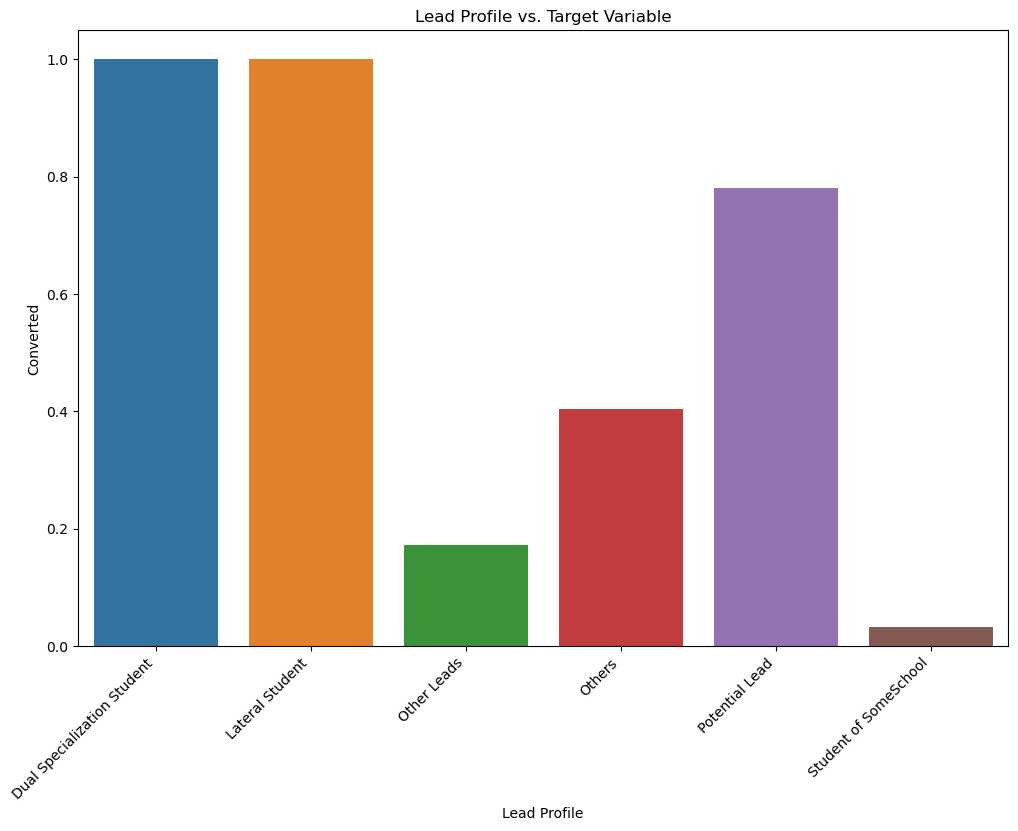

                          City  Converted
0                       Mumbai   0.402328
1                 Other Cities   0.344159
2  Other Cities of Maharashtra   0.440716
3           Other Metro Cities   0.408488
4            Thane & Outskirts   0.446381
5               Tier II Cities   0.337838


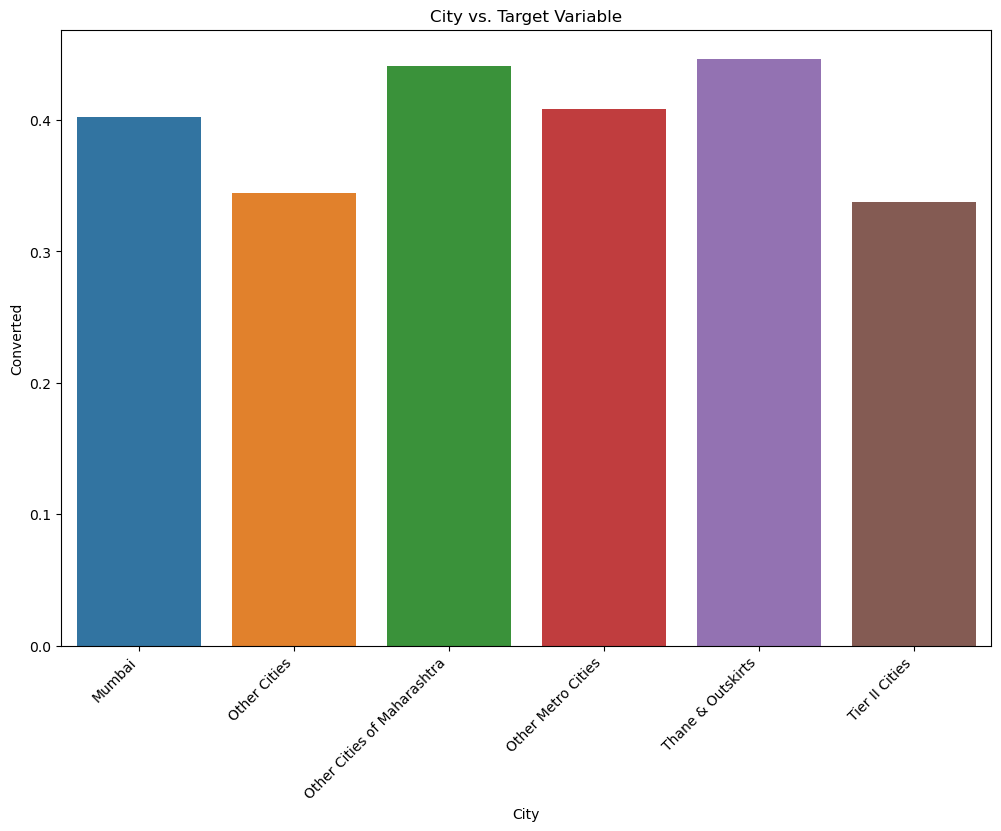

  I agree to pay the amount through cheque  Converted
0                                       No   0.380204


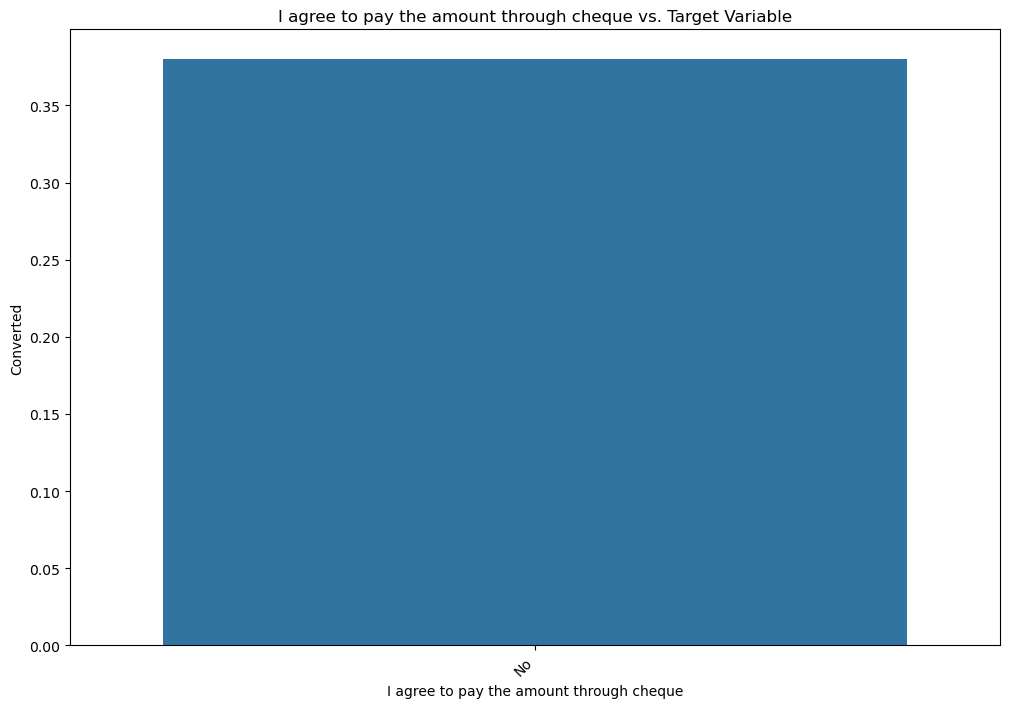

  A free copy of Mastering The Interview  Converted
0                                     No   0.391150
1                                    Yes   0.356648


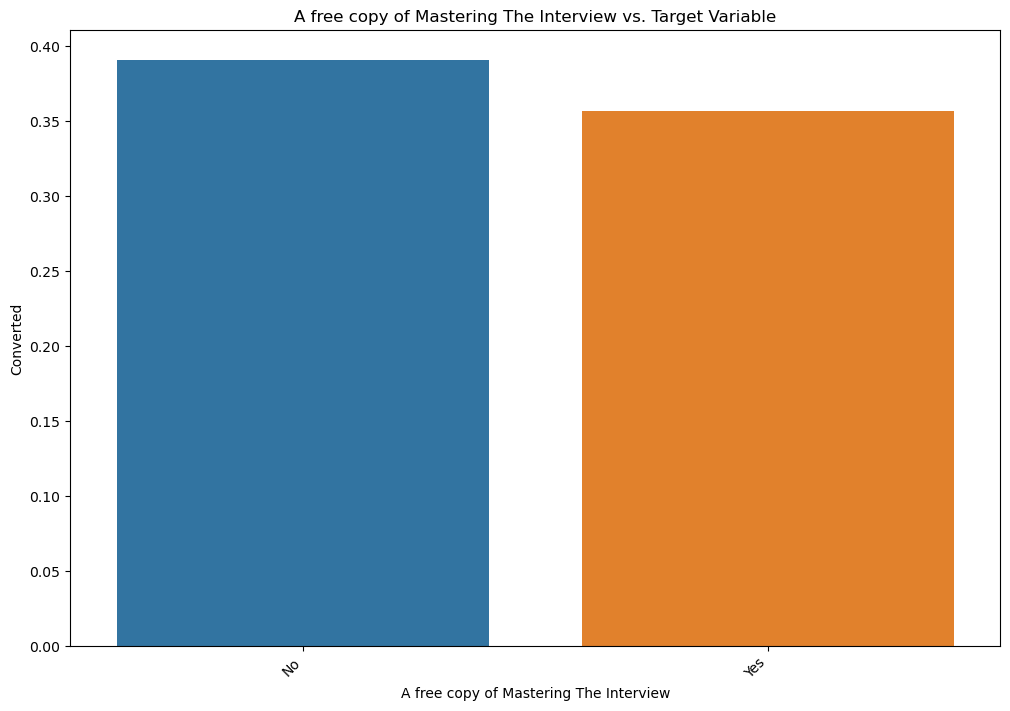

           Last Notable Activity  Converted
0             Approached upfront   1.000000
1                  Email Bounced   0.150000
2             Email Link Clicked   0.260116
3              Email Marked Spam   1.000000
4                   Email Opened   0.369296
5                 Email Received   1.000000
6      Form Submitted on Website   0.000000
7       Had a Phone Conversation   0.928571
8                       Modified   0.208869
9        Olark Chat Conversation   0.136612
10       Page Visited on Website   0.292453
11        Resubscribed to emails   1.000000
12                      SMS Sent   0.694291
13                   Unreachable   0.687500
14                  Unsubscribed   0.297872
15  View in browser link Clicked   0.000000


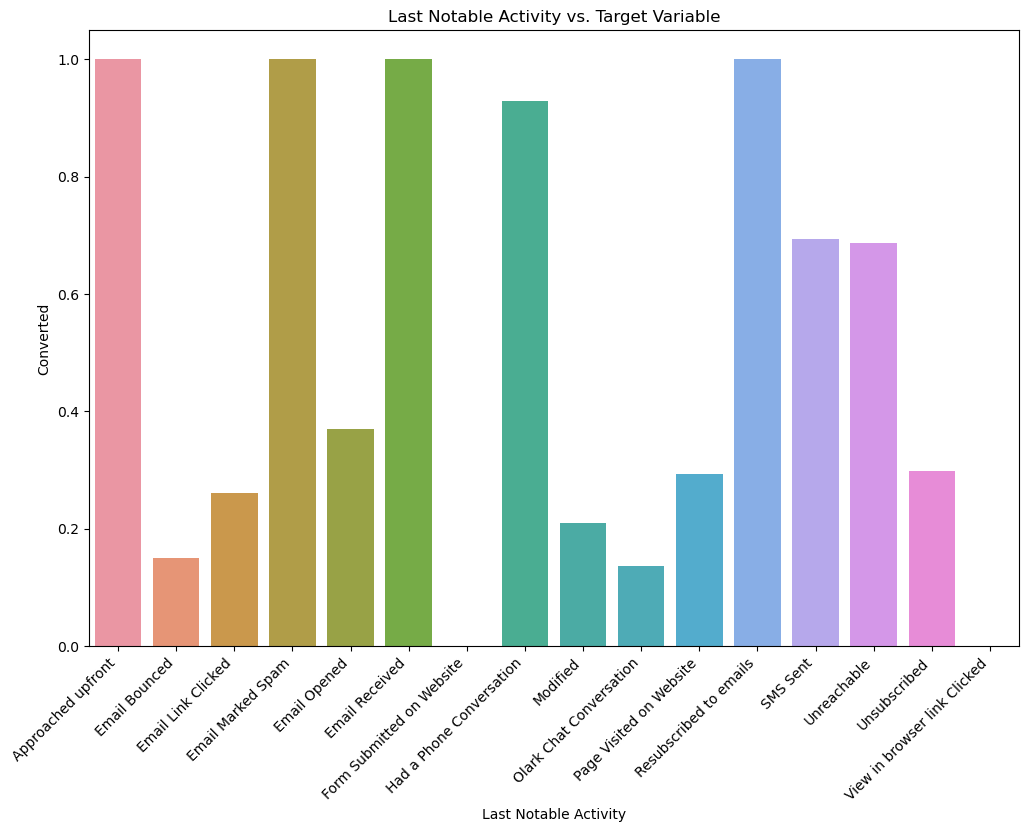

In [31]:
target_variable='Converted'    
eda_bivariate_analysis(df, categorical_features,numeric_features,target_variable)

### Preparing X and Y variables

In [32]:
# Dropping columns with only one level
df = df.drop(columns=['Magazine','Receive More Updates About Our Courses','Get updates on DM Content',
                      'Update me on Supply Chain Content','I agree to pay the amount through cheque'
                      ],axis=1)

In [33]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,...,No,No,No,No,No,No,Others,Other Cities,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Others,Other Cities,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Others,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Others,Mumbai,No,Modified


In [34]:
X = df.drop(columns=['Converted'],axis=1)
y = df['Converted']

In [35]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [36]:
cat_features

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [37]:
# Assuming df_Leads is your DataFrame and the specified columns are categorical
categorical_columns = cat_features

# creating dummy variable
dummy_var= pd.get_dummies(X[categorical_columns], drop_first=True)


In [38]:
# Concatenating the dummy_data to the lead_data dataframe
X = pd.concat([X, dummy_var], axis=1)

In [39]:
X = X.drop(categorical_columns, axis = 1)

In [40]:
#creating three sets - training, test and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.fit_transform(X_test[num_features])

### RFE

In [42]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()

In [43]:
from sklearn.feature_selection import RFE
rfe = RFE(Logreg, n_features_to_select = 30)            
# running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 71),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 72),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Source_Direct Traffic', False, 31),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 60),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', False, 85),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Pay per Click Ads', False, 77),
 ('Lead Source_Press_Release', False, 98),
 ('Lead Source_Reference', False, 95),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 50),
 ('Lead Source_WeLearn', False, 74),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 73),
 ('Lead Source_blog', False, 61),
 ('Lead Source_google', False, 45),
 ('Lead Source_testone', False, 54),
 ('Lead S

In [45]:
col_top = X_train.columns[rfe.support_]

### Model building

In [46]:
import statsmodels.api as sm

In [47]:
X_train_sm = sm.add_constant(X_train[col_top])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7251
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.1
Date:                Mon, 20 Nov 2023   Deviance:                       5492.2
Time:                        18:24:31   Pearson chi2:                 7.43e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4391
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1621      0.174      6.691      0.000       0.822       1.503
Total Time Spent on Website                              1.1184      0.040     28.037      0.000       1.040       1.197
Lead Origin_Lead Add Form                                1.9532      0.222      8.805      0.000       1.518       2.388
Lead Source_NC_EDM                                      24.8298   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             3.1768      1.031      3.082      0.002       1.157       5.197
Do Not Email_Yes                                        -1.2965      0.184     -7.045      0.000      -1.657      -0.936
Last Activity_Converted to Lead                         -0.7590      0.213     -3.570      0.000      -1.176      -0.342
Last Activity_Email Bounced                             -0.8538      0.388     -2.198      0.028      -1.615      -0.092
Last Activity_Had a Phone Conversation                   1.4673      0.658      2.229      0.026       0.177       2.758
Last Activity_Olark Chat Conversation                   -1.0799      0.195     -5.547      0.000      -1.461      -0.698
Last Activity_SMS Sent                                   0.5767      0.145      3.967      0.000       0.292       0.862
Country_Italy                                          -24.9381   4.32e+04     -0.001      1.000   -8.46e+04    8.46e+04
Country_Nigeria                                        -24.5172   3.49e+04     -0.001      0.999   -6.84e+04    6.84e+04
Country_Oman                                             2.0370      1.330      1.531      0.126      -0.570       4.644
Country_Others                                           1.4006      0.105     13.398      0.000       1.196       1.606
Country_Qatar                                           -1.7863      1.207     -1.480      0.139      -4.152       0.580
Country_Saudi Arabia                                    -1.0392      0.812     -1.279      0.201      -2.631       0.553
Specialization_Hospitality Management                   -0.8145      0.326     -2.495      0.013      -1.454      -0.175
How did you hear about X Education_Email                 0.8818      0.591      1.493      0.136      -0.276       2.040
What is your current occupation_Housewife               23.9436   2.55e+04      0.001      0.999      -5e+04    5.01e+04
What is your current occupation_Others                  -1.1669      0.156     -7.468      0.000      -1.473      -0.861
What is your current occupation_Working Professional     2.2032      0.187     11.788      0.000       1.837       2.570
Lead Profile_Lateral Student                            21

In [48]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_top].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_top].values, i) for i in range(X_train[col_top].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Lead Profile_Other Leads,8.30
19,What is your current occupation_Others,6.66
23,Lead Profile_Others,3.24
27,Last Notable Activity_Modified,2.82
26,Last Notable Activity_Email Opened,2.57
13,Country_Others,2.36
9,Last Activity_SMS Sent,2.32
8,Last Activity_Olark Chat Conversation,2.15
1,Lead Origin_Lead Add Form,1.88
4,Do Not Email_Yes,1.80


In [50]:
col_top = col_top.drop("Lead Profile_Other Leads")

In [51]:
X_train_sm = sm.add_constant(X_train[col_top])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7252
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2778.2
Date:                Mon, 20 Nov 2023   Deviance:                       5556.5
Time:                        18:24:32   Pearson chi2:                 7.49e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4341
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8149      0.165      4.936      0.000       0.491       1.138
Total Time Spent on Website                              1.1272      0.040     28.346      0.000       1.049       1.205
Lead Origin_Lead Add Form                                1.9994      0.220      9.084      0.000       1.568       2.431
Lead Source_NC_EDM                                      24.8463   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             3.1313      1.030      3.039      0.002       1.112       5.151
Do Not Email_Yes                                        -1.3138      0.183     -7.191      0.000      -1.672      -0.956
Last Activity_Converted to Lead                         -0.8721      0.210     -4.153      0.000      -1.284      -0.461
Last Activity_Email Bounced                             -0.9280      0.387     -2.399      0.016      -1.686      -0.170
Last Activity_Had a Phone Conversation                   1.5513      0.649      2.391      0.017       0.280       2.823
Last Activity_Olark Chat Conversation                   -1.1092      0.193     -5.760      0.000      -1.487      -0.732
Last Activity_SMS Sent                                   0.5989      0.143      4.177      0.000       0.318       0.880
Country_Italy                                          -24.9725   4.31e+04     -0.001      1.000   -8.45e+04    8.44e+04
Country_Nigeria                                        -24.2110    3.5e+04     -0.001      0.999   -6.86e+04    6.86e+04
Country_Oman                                             2.0164      1.348      1.496      0.135      -0.625       4.658
Country_Others                                           1.4330      0.104     13.786      0.000       1.229       1.637
Country_Qatar                                           -1.8684      1.191     -1.569      0.117      -4.202       0.465
Country_Saudi Arabia                                    -1.1332      0.814     -1.391      0.164      -2.729       0.463
Specialization_Hospitality Management                   -0.8567      0.321     -2.672      0.008      -1.485      -0.228
How did you hear about X Education_Email                 0.8713      0.576      1.513      0.130      -0.257       2.000
What is your current occupation_Housewife               23.8589   2.53e+04      0.001      0.999   -4.96e+04    4.96e+04
What is your current occupation_Others                  -2.0693      0.103    -20.092      0.000      -2.271      -1.867
What is your current occupation_Working Professional     2.2159      0.184     12.023      0.000       1.855       2.577
Lead Profile_Lateral Student                            22

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_top].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_top].values, i) for i in range(X_train[col_top].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Lead Profile_Others,2.80
26,Last Notable Activity_Modified,2.57
19,What is your current occupation_Others,2.54
13,Country_Others,2.36
9,Last Activity_SMS Sent,2.16
25,Last Notable Activity_Email Opened,2.15
8,Last Activity_Olark Chat Conversation,2.13
1,Lead Origin_Lead Add Form,1.87
4,Do Not Email_Yes,1.79
6,Last Activity_Email Bounced,1.77


### Accuracy For training data 

In [53]:
# Predict y values on the training set
y_train_pred = res.predict(X_train_sm)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluation metrics on training set
accuracy_train = accuracy_score(y_train, y_train_pred_binary)
conf_matrix_train = confusion_matrix(y_train, y_train_pred_binary)
classification_rep_train = classification_report(y_train, y_train_pred_binary)

# Display the results for training set
print(f'Training Accuracy: {accuracy_train:.4f}')
print('\nTraining Confusion Matrix:')
print(conf_matrix_train)
print('\nTraining Classification Report:')
print(classification_rep_train)

Training Accuracy: 0.8283

Training Confusion Matrix:
[[3996  486]
 [ 764 2036]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4482
           1       0.81      0.73      0.77      2800

    accuracy                           0.83      7282
   macro avg       0.82      0.81      0.81      7282
weighted avg       0.83      0.83      0.83      7282



### Accuracy for test data

In [54]:
# Add constant to X_test
X_test_sm = sm.add_constant(X_test[col_top])

# Predict y values on the test set
y_pred = res.predict(X_test_sm)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.8446

Confusion Matrix:
[[1035  125]
 [ 158  503]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1160
           1       0.80      0.76      0.78       661

    accuracy                           0.84      1821
   macro avg       0.83      0.83      0.83      1821
weighted avg       0.84      0.84      0.84      1821



In [55]:
res.params.sort_values(ascending=False)

Lead Source_NC_EDM                                      24.846282
What is your current occupation_Housewife               23.858871
Lead Profile_Lateral Student                            22.204632
Lead Source_Welingak Website                             3.131319
What is your current occupation_Working Professional     2.215865
Country_Oman                                             2.016424
Lead Origin_Lead Add Form                                1.999422
Last Activity_Had a Phone Conversation                   1.551287
Country_Others                                           1.432959
Total Time Spent on Website                              1.127157
How did you hear about X Education_Email                 0.871329
const                                                    0.814857
Last Activity_SMS Sent                                   0.598909
Last Notable Activity_Olark Chat Conversation           -0.733139
Specialization_Hospitality Management                   -0.856720
Last Activ